# Model selection

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Add iPython magic to print charts
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

In [3]:
x = pd.read_csv(filepath_or_buffer="datasets/x_opening.csv")

y = x["worldwide_gross"]
x = x.drop(labels=["worldwide_gross"], axis=1)

results = cross_validate(estimator=Lasso(), X=x, y=y, cv=5, return_train_score=True)
results

{'fit_time': array([0.00461197, 0.02042723, 0.0248704 , 0.0418129 , 0.01573896]),
 'score_time': array([0.00221944, 0.00188017, 0.00307131, 0.00365114, 0.00424457]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [4]:
train_score = results["train_score"]
test_score = results["test_score"]
print("Train score:", train_score.mean())
print("Test score: ", test_score.mean())

Train score: 0.7491178363039036
Test score:  0.44964021745791827


The result obtained shows a high variance between the train and test scores.

## Use KNeighbors model and validation curve

In [5]:
cross_validate(estimator=KNeighborsRegressor(), X=x, y=y, cv=5)

{'fit_time': array([0.00799417, 0.00780463, 0.00541782, 0.00294137, 0.00371623]),
 'score_time': array([0.00810432, 0.00997615, 0.00509834, 0.00365686, 0.00350618]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [6]:
cross_validate(estimator=KNeighborsRegressor(n_neighbors=10), X=x, y=y, cv=5)

{'fit_time': array([0.00549436, 0.00387859, 0.00323653, 0.0035038 , 0.00332928]),
 'score_time': array([0.00563622, 0.00488377, 0.00489068, 0.00451541, 0.00378656]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [7]:
param_range = np.arange(2, 50, 2)
param_range

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [8]:
train_scores, test_scores = validation_curve(
    estimator=KNeighborsRegressor(),
    X=x,
    y=y,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5
)

print(train_scores.shape)
print(test_scores.shape)

(24, 5)
(24, 5)


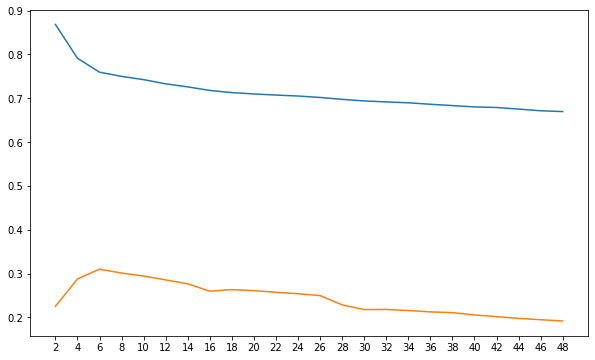

In [18]:
plt.plot(np.mean(a=train_scores, axis=1))
plt.plot(np.mean(a=test_scores, axis=1))
plt.xticks(ticks=np.arange(24), labels=param_range);